In [1]:
from HGCalImageAlgo3D import *
from utility_benchmark import *
from timeit import default_timer as timer


%matplotlib inline
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

DatasetDir  = '/Users/zihengchen/Documents/HGCal/workplace/data/'
DatasetFile = 'CMSSW93X_pt35_pu000'
#%run ../scripts/utility_getinputhits_genpart.py $DatasetDir $DatasetFile 6 100

Welcome to JupyROOT 6.10/00


In [2]:
df = pd.read_hdf(DatasetDir+"input/"+DatasetFile+"_rechit.h5",key="table")

# 1. Run clustering

In [3]:
imagalgo = ImagingAlgo()
dfresultclus = imagalgo.RunImagingAlgo(df,N=100)
dfresultclus.to_pickle("../data/output/"+DatasetFile+"_OutputClus.pkl")

100%|██████████| 99/99 [00:08<00:00, 11.41it/s]


# 2. Resolution Plots

In [4]:
gene,cluse,clusn = getoutputclust(DatasetDir,DatasetFile,N=100,deltarho=5)
eff,ave          = effsigma(cluse/gene)
print("{:15.15}{:6.3f}, {:6.3f}".format(DatasetFile,eff,ave))

CMSSW93X_pt35_p 0.125,  0.773


noPU:  sigma,mean: (0.12460070339787216, 0.77280960125307041)
PU200: sigma,mean: (0.28802152171131667, 0.99807504357855237)


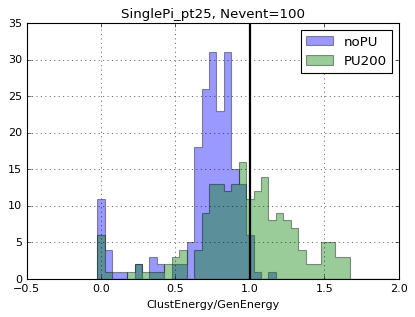

In [5]:
deltarho = 5
energyeff_pu000 = energyeff(DatasetDir,'CMSSW93X_pt35_pu000',N=100,deltarho=5)
energyeff_pu200 = energyeff(DatasetDir,'CMSSW93X_pt35_pu200',N=100,deltarho=5)

print("noPU:  sigma,mean: {}".format(effsigma(energyeff_pu000)))
print("PU200: sigma,mean: {}".format(effsigma(energyeff_pu200)))
    
plt.hist(energyeff_pu000,bins=np.arange(0-0.025,2.0,0.05),histtype="stepfilled",alpha=0.4,lw=1,label="noPU")
plt.hist(energyeff_pu200,bins=np.arange(0-0.025,2.0,0.05),histtype="stepfilled",alpha=0.4,lw=1,label="PU200")
plt.axvline(1,lw=2,c="k")
plt.grid(True)
plt.legend()
plt.xlabel("ClustEnergy/GenEnergy")
plt.title("SinglePi_pt25, Nevent=100")
plt.savefig("../plot/pu200.png")

# Under Construction

In [ ]:
def test(a,b,c,d):
    SetImagingAlgo(AFFINITY_Z_  = a, #cm
                   KERNAL_R_    = b, 
                   KERNAL_Z_    = 2*a, 
                   KERNAL_EXPC_ = 0.5, 
                   MAXDISTANCE_ = 200, #cm
                   DECISION_RHO_KAPPA_ = 10,
                   DECISION_NHD_= c,#cm
                   CONTINUITY_NHD_ = d#cm
                  )
    dfresultclus = RunImagingAlgo(df,N=100)
    dfresultclus.to_pickle(DatasetDir+"output/{}/{:02.1f}_{:02.1f}_{:02.1f}_{:02.1f}.pkl".format(DatasetFile,a,b,c,d))

for t in np.arange(0.4,2.4,0.2):
    test(t,4.0,4.0,6.0)

In [ ]:
import glob  
DatasetFile = 'CMSSW93X_pt35_pu000'
pickle_list = glob.glob(DatasetDir+"output/{}/".format(DatasetFile)+"/*.pkl")
temp = []
for pkl in pickle_list:
    energyeff_pu000 = energyeff(DatasetDir,DatasetFile,N=100,deltarho=100, test=pkl)
    eff,ave = effsigma(energyeff_pu000)
    print("{:20}:{:6.3f}GeV, {:6.3f}GeV".format(pkl[-20:],eff,ave))
    temp.append(eff)
temp = np.array(temp)